<a href="https://colab.research.google.com/github/Sanaz-salari/Feature-Selection/blob/main/Lasso_with_Coordinate_Descent_HW1_Sanaz_Salari_Sent_for_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import math
import random

###########################

#Generate synthetic data:

d = 1000
k = 100
n = 500

###########################

# Calculate W: [w1, w2, w3, ..., wk,..., wd] with shape 1*d
W = [0]*d
W_1 = [(j+1)/k for j in range(0,k)] 
W[0:len(W_1)]=W_1  
W = np.array(W) 
W = W.reshape(d,1) 


###########################

#Calculate X as a matrix with size n*d including xij elements: 
random.seed(1) 
X = np.random.normal(0, 1, (n,d)) 

###########################

# Calculate Eps array with epsi elements
Eps = np.random.normal(0,0.1,n)
Eps = Eps.reshape(n,1) 

###########################

# Calculate Y array with yi elements
Y = X @ W + Eps 
len(Y)
f = np.sum(Y)  
b = 1/n * (f - np.sum(X @ W))   
#Generate synthetic data
#Ending 


############################################################

############################################################

# Lambda_max
Lambda0 = np.zeros((d,1)) 
for k in range(0,d):
  for i in range(0,n):
    Lambda0[k] = X[i,k] * (Y[i] - ((1/n)*f)) + Lambda0[k]


Lambda_middle= 2*np.abs(Lambda0) 
Lambda_max = np.amax(Lambda_middle) 
Lambda = Lambda_max


##########################################################3

# Coordinate descent algorithm  

W2 = np.copy(W) 
W1 = np.zeros((d,1))
diff = np.amax(np.abs(W2 - W1))
delta = 0.002
q = 0
Lambda_val = np.array([])
nonzero_val = np.array([]) 
W2_iter = [[]]
W22 = W2.tolist() 
W2_iter.append(W22) 
W2_iter_new = np.delete(W2_iter,[0])


##############################
######################     While loop    #######################################

while diff >= delta:
  q = q + 1 
  print('number of while loop iteration is:', q)
  
# Calculate A, C, W1

  A = np.zeros((d,1)) 
  C = np.zeros((d,1)) 
  W1 = np.copy(W2) 
  eli = np.zeros((n,1))
#################################### Inner for loops ################################## 
  for k in range(0,d):
    
    for i in range(0,n):
      A[k] = 2 * (np.power(X[i,k], 2)) + A[k] 
      s = 0 
      eli[i] = X[i,:]@W - X[i,k]*W[k]
      C[k] = 2*((X[i,k]*(Y[i] - (b + eli[i])))) + C[k] 
    if C[k] < -1*Lambda:
      W2[k] = (C[k] + Lambda)/A[k]
    elif C[k] >= -1*Lambda and C[k] <= Lambda:
      W2[k] = 0
    else:
      W2[k] = (C[k] - Lambda)/A[k]


  # nonzero values
  nonzero = np.count_nonzero(W2)
  nonzero_val = np.append( nonzero_val, nonzero) 

  # Lambda value
  Lambda_val = np.append( Lambda_val, Lambda) 

  # Append W2 to an array W2_iter after each running while loop
  W22 = W2.tolist()
  W2_iter.append(W22)

  
  Lambda =  Lambda/1.5
  b = 1/n * (f - np.sum(X @ W2)) 
  
  diff = np.amax(np.abs(W2 - W1))
  
  print('diff is:', diff)
  print('nonzero is:', nonzero)
  #print('Lambda_val is:', Lambda_val)
  #print('nonzero_val is:', nonzero_val)
# delta= diff+1




/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


number of while loop iteration is: 1
diff is: 1.0
nonzero is: 0
number of while loop iteration is: 2
diff is: 0.12064994393911559
nonzero is: 7
number of while loop iteration is: 3
diff is: 0.3189376015630587
nonzero is: 38
number of while loop iteration is: 4
diff is: 0.22866954792021854
nonzero is: 59
number of while loop iteration is: 5
diff is: 0.15264546456153344
nonzero is: 71
number of while loop iteration is: 6
diff is: 0.10301136691576451
nonzero is: 83
number of while loop iteration is: 7
diff is: 0.07084578770754935
nonzero is: 89
number of while loop iteration is: 8
diff is: 0.04768956559746662
nonzero is: 92
number of while loop iteration is: 9
diff is: 0.03304495507578326
nonzero is: 96
number of while loop iteration is: 10
diff is: 0.022302865861602433
nonzero is: 96
number of while loop iteration is: 11
diff is: 0.014713558539464669
nonzero is: 98
number of while loop iteration is: 12
diff is: 0.009790471283440821
nonzero is: 98
number of while loop iteration is: 13
dif

Text(0.5, 1.0, 'Change of Lambda vs nonzero values ')

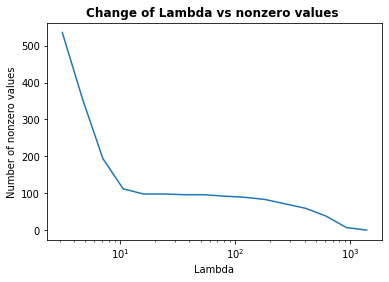

In [ ]:
##############################################
#Plot nonzero values vs. lambda:

x = np.copy(Lambda_val)
#x
y = np.copy(nonzero_val)
#y

plt.xscale('log')
plt.plot(x,y)
plt.xlabel('Lambda') 
plt.ylabel('Number of nonzero values') 
plt.title('Change of Lambda vs nonzero values ', fontweight ="bold") 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'TPR vs FDR')

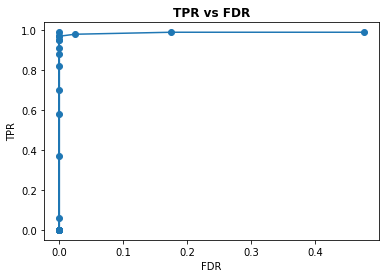

In [ ]:
#############################################

# Plot FDR vs. TPR

W2_iter_new = np.delete(W2_iter,[0])  
FDR = np.zeros((1,q))
TPR = np.zeros((1,q))
k = 100
d = 1000
for h in range(0,q):
  N = 0
  W_hat = W2_iter_new[h]
  #split W_hat to two parts: 0-(k-1), 
  W_hat1 = W_hat[0:k-1] #TPR
  W_hat2 = W_hat[k:d] #FDR
  nonzero1 = np.count_nonzero(W_hat1)
  nonzero2 = np.count_nonzero(W_hat2) #FDR
  TPR = np.append( TPR, nonzero1)
  FDR = np.append( FDR, nonzero2)
  N = N + 1

FDR = np.divide(FDR, nonzero)
TPR = TPR / k
x1 = FDR
#x
y1 = TPR
#y
plt.scatter(x1,y1)
plt.plot(x1,y1)
plt.xlabel('FDR') 
plt.ylabel('TPR') 
plt.title('TPR vs FDR', fontweight ="bold") 